In [27]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from json import loads, dumps
import math
import matplotlib



# Benchmark - Acc + Feat selection time - Tree

In [64]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark-final"
tfd_filename = "results_autofeat.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"
join_all_filename = "results_join_all.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)
df_ja = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{join_all_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base, df_ja])
# dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'
dataframe.loc[dataframe['approach']=='Join_All_BFS', 'approach'] = 'JoinAll'
dataframe.loc[dataframe['approach']=='Join_All_BFS_Filter', 'approach'] = 'JoinAllF'



# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)
dataframe['feature_selection_time'] = dataframe['feature_selection_time'].fillna(0)


['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'credit', 'covertype', 'school', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE', 'JoinAll', 'JoinAllF']


<Figure size 640x480 with 0 Axes>

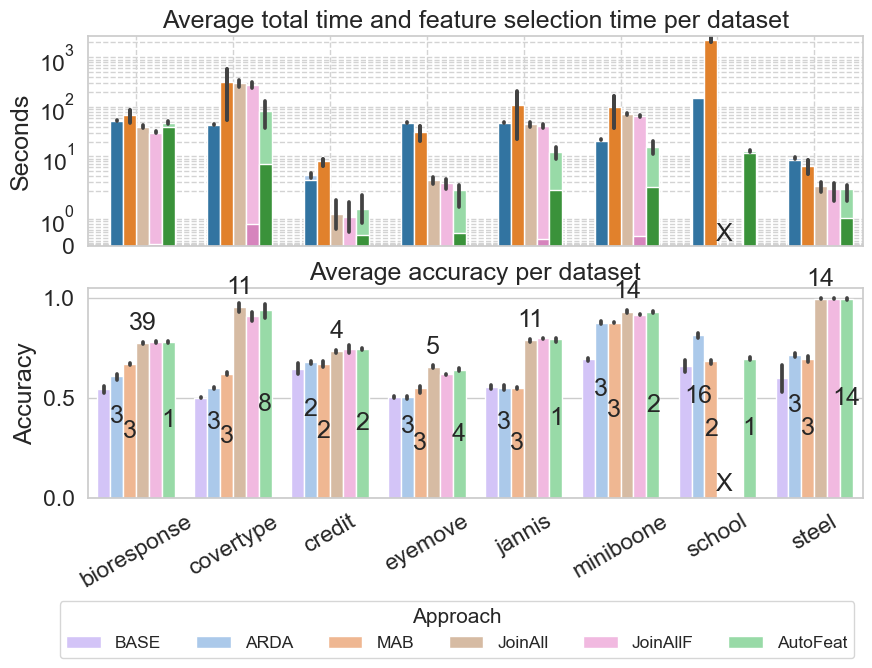

In [65]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")
pal2 = sns.color_palette('tab10')


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')

time_variable = 'feature_selection_time'
df = dataframe[dataframe['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]

# df = dataframe


# total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', time_variable])[['accuracy']].idxmax()
total_time = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]

accuracy_cls = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]

# accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y='total_time', hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)

ax1 = sns.barplot(x="data_label", y=time_variable, hue="approach", 
                data=taux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
                palette=[pal2[4], pal2[0], pal2[1], pal2[5], pal2[6], pal2[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)




ax1.set_title("Average total time and feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('symlog')
# ax1.set_ylim()
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')
ax1.bar_label(ax1.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge')



ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
#                 palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, '', 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge', padding=6)
ax2.bar_label(ax2.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)

# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax2.bar_label(ax2.containers[5], labels=autofeat_tables, label_type='center')



loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')

# plt.savefig('plots/revision/benchmark-all.pdf', dpi=300, bbox_inches="tight")

In [74]:
print(total_time[total_time['approach'] == 'JoinAll']['total_time'].mean())

print(total_time[total_time['approach'] == 'AutoFeat']['total_time'].mean())

print(total_time[total_time['approach'] == 'JoinAllF']['total_time'].mean())



print(total_time[total_time['approach'] == 'JoinAllF']['feature_selection_time'].mean())

print(total_time[total_time['approach'] == 'AutoFeat']['feature_selection_time'].mean())

66.04667797258922
22.16886681318283
59.37442684173584
0.21736928394862579
8.115156769752502


# Benchmark - KNN + Linear

<Figure size 640x480 with 0 Axes>

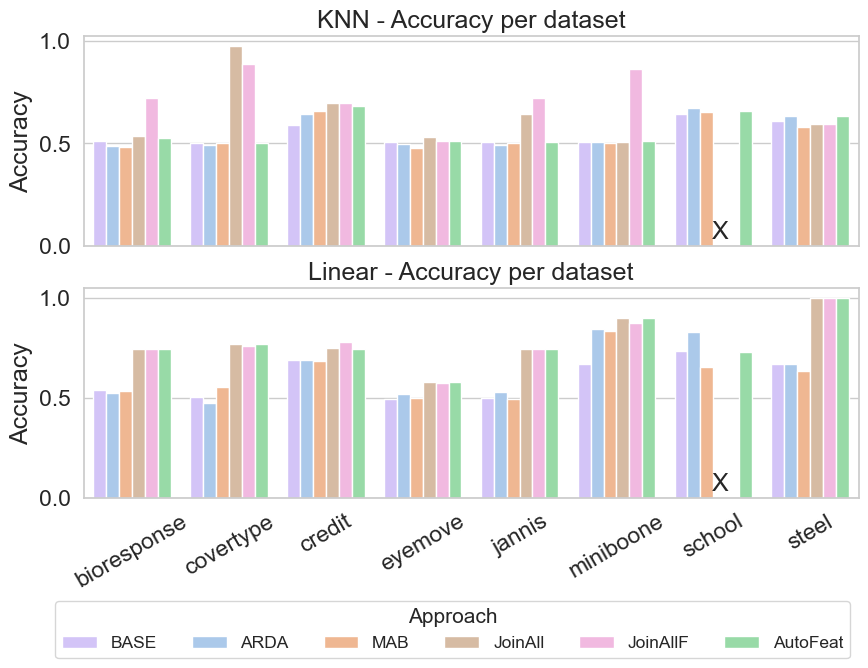

In [57]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


df_time = dataframe[dataframe['algorithm']=='KNeighbors']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
#                   palette=[pal[4], pal[0], pal[1], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
#                  ax=ax1)
                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()
ax1.bar_label(ax1.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)


df_time = dataframe[dataframe['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls,
                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)
#                  ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  
ax2.bar_label(ax2.containers[3], labels=['', '', '', '', '', '', 'X', ''], label_type='edge', padding=-2)


loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')



plt.savefig('plots/revision/benchmark_linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")


In [78]:
knn = dataframe[dataframe['algorithm']=='KNeighbors']
knn[knn['data_label'] == 'credit'].groupby(by=['approach']).mean('accuracy')

,total_time,feature_selection_time,accuracy,train_time,cutoff_threshold,rank,top_k
approach,,,,,,,
ARDA,3.536389,3.390326,0.645,0.146063,NaN,NaN,NaN
AutoFeat,0.615278,0.388358,0.664,0.226920,0.65,0.97164,15.0
BASE,0.142320,0.000000,0.590,0.142320,NaN,NaN,NaN
JoinAll,0.457000,0.000000,0.695,0.249840,NaN,NaN,NaN
JoinAllF,0.395900,0.003011,0.695,0.185729,NaN,NaN,NaN
MAB,2.880000,2.880000,0.655,0.000000,NaN,NaN,NaN


# Ablation - Relevance, redundancy

In [58]:
folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/benchmark-final"
filename = "results_tfd_ablation.csv"
autofeat_filename = "results_autofeat.csv"


# Read data
ablation_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{filename}"), header=0)
autofeat_df = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{autofeat_filename}"), header=0)

ablation_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
autofeat_df.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)
autofeat_df.loc[autofeat_df['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(ablation_df['algorithm'].unique())
print(algs)

tables = list(ablation_df['data_label'].unique())
print(tables)

approach = list(ablation_df['approach'].unique())
print(approach)

['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['steel', 'jannis', 'miniboone', 'eyemove', 'bioresponse', 'credit', 'covertype', 'school']
['AutoFeat-Pearson-MRMR', 'AutoFeat-Pearson-JMI', 'AutoFeat-Spearman-JMI', 'AutoFeat_Red', 'AutoFeat_Rel']


In [62]:
a_idx = ablation_df[ablation_df['algorithm'] == 'XGBoost'].groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc = ablation_df.loc[a_idx]
max_acc = max_acc[['data_label', 'approach', 'total_time', 'feature_selection_time', 'train_time', 'accuracy']]
max_acc


af_idx = autofeat_df[(autofeat_df['algorithm'] == 'XGBoost')].groupby(by=['data_label', 'approach'])['accuracy'].idxmax()
max_acc_af = autofeat_df.loc[af_idx]
max_acc_af = max_acc_af[['data_label', 'approach', 'total_time','feature_selection_time', 'train_time', 'accuracy']]
max_acc_af

,data_label,approach,total_time,feature_selection_time,train_time,accuracy
327,bioresponse,AutoFeat,54.803325,39.627401,15.175924,0.784571
477,covertype,AutoFeat,160.609625,6.942177,153.667447,0.967452
393,credit,AutoFeat,0.824797,0.388358,0.436439,0.750000
273,eyemove,AutoFeat,1.567921,0.459549,1.108371,0.658344
135,jannis,AutoFeat,9.068763,2.136092,6.932671,0.800278
243,miniboone,AutoFeat,15.512172,2.376915,13.135257,0.939726
489,school,AutoFeat,12.351127,11.954049,0.397079,0.709859
9,steel,AutoFeat,1.667572,1.036712,0.630860,1.000000


<Figure size 640x480 with 0 Axes>

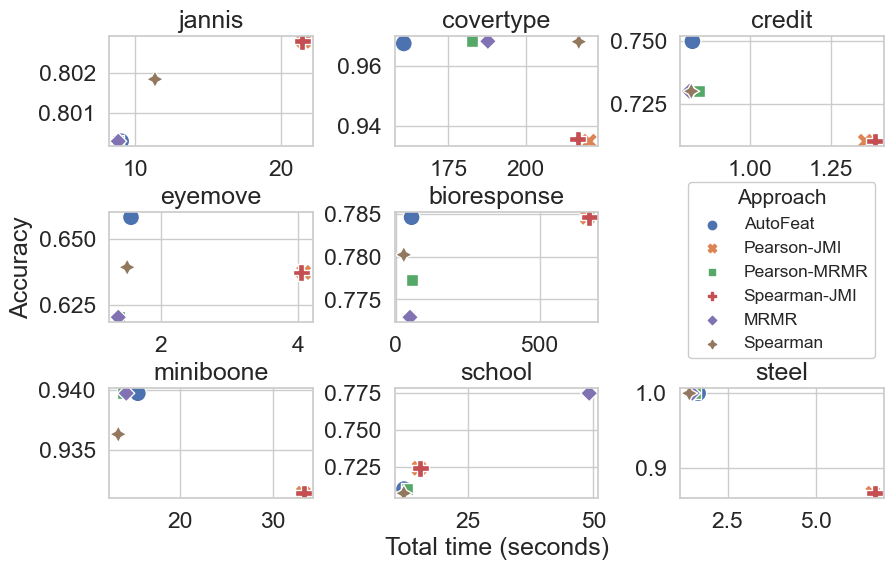

In [63]:
plot_data = pd.concat([max_acc_af, max_acc])
plot_data.loc[plot_data['approach']=='AutoFeat', 'approach'] = 'AutoFeat'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-JMI', 'approach'] = 'Pearson-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat-Pearson-MRMR', 'approach'] = 'Pearson-MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat-Spearman-JMI', 'approach'] = 'Spearman-JMI'
plot_data.loc[plot_data['approach']=='AutoFeat_Red', 'approach'] = 'MRMR'
plot_data.loc[plot_data['approach']=='AutoFeat_Rel', 'approach'] = 'Spearman'

sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, axs = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

a00 = plot_data[plot_data['data_label'] == 'jannis']
sns.scatterplot(data=a00, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][0])
axs[0][0].get_legend().remove()
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('')
axs[0][0].set_title('jannis')

a01 = plot_data[plot_data['data_label'] == 'covertype']
sns.scatterplot(data=a01, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][1])
axs[0][1].get_legend().remove()
axs[0][1].set_xlabel('')
axs[0][1].set_ylabel('')
axs[0][1].set_title('covertype')

a02 = plot_data[plot_data['data_label'] == 'credit']
sns.scatterplot(data=a02, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[0][2])
axs[0][2].get_legend().remove()
axs[0][2].set_xlabel('')
axs[0][2].set_ylabel('')
axs[0][2].set_title('credit')



a10 = plot_data[plot_data['data_label'] == 'eyemove']
sns.scatterplot(data=a10, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[1][0])
axs[1][0].get_legend().remove()
axs[1][0].set_xlabel('')
axs[1][0].set_ylabel('Accuracy')
axs[1][0].set_title('eyemove')


a12 = plot_data[plot_data['data_label'] == 'bioresponse']
sns.scatterplot(data=a12, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[1][1])
axs[1][1].get_legend().remove()
axs[1][1].set_xlabel('')
axs[1][1].set_ylabel('')
axs[1][1].set_title('bioresponse')


a20 = plot_data[plot_data['data_label'] == 'miniboone']
sns.scatterplot(data=a20, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][0])
axs[2][0].get_legend().remove()
axs[2][0].set_xlabel('')
axs[2][0].set_ylabel('')
axs[2][0].set_title('miniboone')


a21 = plot_data[plot_data['data_label'] == 'school']
sns.scatterplot(data=a21, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][1])
axs[2][1].get_legend().remove()
axs[2][1].set_xlabel('Total time (seconds)')
axs[2][1].set_ylabel('')
axs[2][1].set_title('school')


a22 = plot_data[plot_data['data_label'] == 'steel']
sns.scatterplot(data=a22, x='total_time', y='accuracy', hue='approach', 
                style='approach', s=150, ax=axs[2][2])
axs[2][2].set_xlabel('')
axs[2][2].set_ylabel('')
axs[2][2].set_title('steel')

axs[1][2].remove()

hh, ll = axs[0][2].get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(1, 2.95), ncol=1, title="Approach", facecolor='white',
           framealpha=1, fontsize="x-small", title_fontsize='small')

plt.savefig('plots/revision/ablation_rel_red.pdf', dpi=300, bbox_inches="tight")

# Lake - Acc + feature selection time - Tree

In [159]:

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/revision/final/lake-final"
tfd_filename = "results_autofeat_path.csv"
arda_filename = "results_arda.csv"
mab_filename = "results_mab.csv"
base_filename = "results_base.csv"


# Read data
df_tfd = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{tfd_filename}"), header=0)
df_arda = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{arda_filename}"), header=0)
df_mab = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{mab_filename}"), header=0)
df_base = pd.read_csv(os.path.join(folder_name, f"{dataset_path}/{base_filename}"), header=0)


# Create a big dataframe
dataframe = pd.concat([df_tfd, df_arda, df_mab, df_base])


# Remove unused columns
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold'], inplace=True)


# Process columns
# number_of_features, features = parse_feature_importance(dataframe)
# dataframe['number_features_importance'] = number_of_features

# number_of_features, jp_features = parse_join_path_features(dataframe)
# dataframe['number_join_path_features'] = number_of_features

# nr_common_features, difference = determine_common_features(dataframe)
# dataframe['nr_common_features'] = nr_common_features
# dataframe['different_features'] = difference

dataframe.loc[dataframe['approach']=='TFD_BFS', 'approach'] = 'AutoFeat'


# Get globnal variables 
algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


dataframe.reset_index(inplace=True)
dataframe.drop(columns=['index'], inplace=True)
dataframe['feature_selection_time'] = dataframe['feature_selection_time'].fillna(0)


['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost', 'KNeighbors', 'LinearModel']
['credit', 'steel', 'jannis', 'miniboone', 'covertype', 'eyemove', 'bioresponse', 'school', 'air', 'yprop', 'superconduct']
['AutoFeat', 'ARDA', 'MAB', 'BASE']


<Figure size 640x480 with 0 Axes>

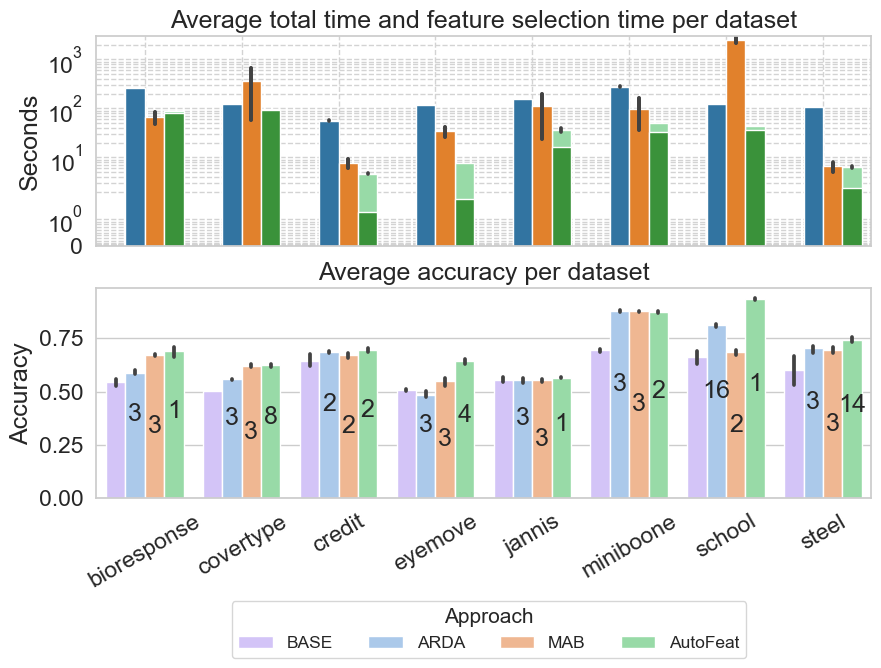

In [160]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")
pal2 = sns.color_palette('tab10')


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# df_basic.sort_values('data_label')

time_variable = 'feature_selection_time'
df = dataframe[dataframe['algorithm'].isin(['RandomForest', 'LightGBM', 'ExtraTrees', 'XGBoost'])]

# total_time = dataframe.groupby(['data_label', 'approach', 'algorithm', time_variable])[['accuracy']].idxmax()
total_time = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]
taux = total_time[~total_time['data_label'].isin(['air', 'superconduct', 'yprop'])]
taux = taux[~taux['approach'].isin(['BASE'])]

accuracy_cls = df.loc[df.groupby(by=['data_label', 'approach', 'algorithm'])['accuracy'].idxmax()]

# accuracy_cls = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()
aux = accuracy_cls[~accuracy_cls['data_label'].isin(['air', 'superconduct', 'yprop'])]


ax1 = sns.barplot(x="data_label", y='total_time', hue="approach", 
                data=taux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
#                 palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)

ax1 = sns.barplot(x="data_label", y=time_variable, hue="approach", 
                data=taux, 
                palette=[pal2[4], pal2[0], pal2[1], pal2[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax1)
#                 palette=[pal2[4], pal2[0], pal2[1], pal2[5], pal2[6], pal2[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax1)




ax1.set_title("Average total time and feature selection time per dataset")
ax1.set_xlabel('')
ax1.set_ylabel('Seconds')
ax1.get_legend().remove()
ax1.set_yscale('symlog')
# ax1.set_ylim()
locmin = matplotlib.ticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=10)  
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.grid(True,which="both",ls="--",c='lightgray')


ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=aux, 
                palette=[pal[4], pal[0], pal[1], pal[2]], hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'], ax=ax2)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Average accuracy per dataset")  


autofeat_tables = [1, 8, 2, 4, 1, 2, 1, 14]
mab_tables = [3, 3, 2, 3, 3, 3, 2, 3]
arda_tables = [3, 3, 2, 3, 3, 3, 16, 3]
total_tables = [39, 11, 4, 5, 11, 14, 'X', 14]

ax2.bar_label(ax2.containers[1], labels=arda_tables, label_type='center', padding=15)
ax2.bar_label(ax2.containers[2], labels=mab_tables, label_type='center')
# ax2.bar_label(ax2.containers[3], labels=total_tables, label_type='edge')
# ax2.bar_label(ax2.containers[4], labels=total_tables, label_type='center')
ax2.bar_label(ax2.containers[3], labels=autofeat_tables, label_type='center', padding=10)



loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.85, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')

# plt.savefig('plots/revision/lake-all.pdf', dpi=300, bbox_inches="tight")

# Lake - KNN + Linear

<Figure size 640x480 with 0 Axes>

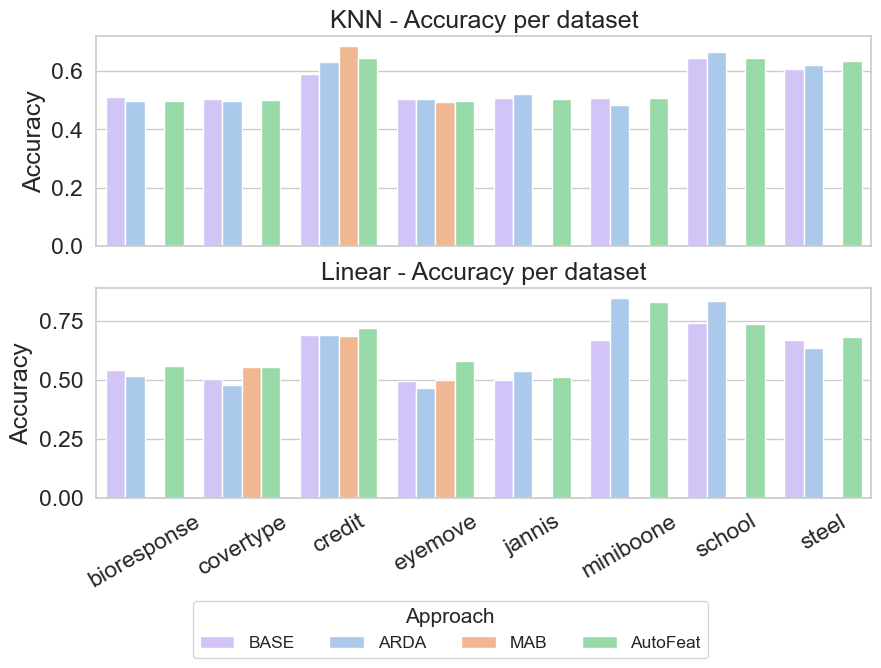

In [164]:
sns.set(font_scale=1.5, style="whitegrid")
pal = sns.color_palette("pastel")


fig = plt.figure()
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)


timevar = 'total_time'
df_time = dataframe[dataframe['algorithm']=='KNeighbors']
# df_time = df[df['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax1 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls, 
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
                 ax=ax1)
#                   palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAll-Filter', 'AutoFeat'], ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('Accuracy')
ax1.set_title("KNN - Accuracy per dataset")  
ax1.get_legend().remove()

# loc, labels = plt.xticks()
# hh, ll = plt.gca().get_legend_handles_labels()

# ax2.set_xticklabels(labels, rotation=30)
# plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.4), ncol=6, title="Approach", fontsize='small')


df_time = dataframe[dataframe['algorithm']=='LinearModel']

accuracy_cls = df_time.groupby(['data_label', 'approach'])['accuracy'].max().reset_index()

ax2 = sns.barplot(x="data_label", y="accuracy", hue="approach", 
                data=accuracy_cls,
                  palette=[pal[4], pal[0], pal[1], pal[2]], 
                  hue_order=['BASE', 'ARDA', 'MAB', 'AutoFeat'],
#                  palette=[pal[4], pal[0], pal[1], pal[5], pal[6], pal[2]], 
#                   hue_order=['BASE', 'ARDA', 'MAB', 'JoinAll', 'JoinAllF', 'AutoFeat'], ax=ax2)
                 ax=ax2)

ax2.set_xlabel('')
ax2.set_ylabel('Accuracy')
ax2.set_title("Linear - Accuracy per dataset")  

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

ax2.set_xticklabels(labels, rotation=30)
plt.legend(hh, ll, bbox_to_anchor=(0.8, -0.45), ncol=6, title="Approach", fontsize='x-small', title_fontsize='small')



# plt.savefig('plots/revision/linear_knn_accuracy.pdf', dpi=300, bbox_inches="tight")
